Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514 / EEL7513 / EEL410250 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bU}{\mathbf{U}}$
$\newcommand{\bu}{\mathbf{u}}$
$\newcommand{\bV}{\mathbf{V}}$
$\newcommand{\bv}{\mathbf{v}}$
$\newcommand{\bG}{\mathbf{G}}$
$\newcommand{\bg}{\mathbf{g}}$
$\newcommand{\bZ}{\mathbf{Z}}$
$\newcommand{\bz}{\mathbf{z}}$
$\newcommand{\bmu}{\boldsymbol{\mu}}$
$\newcommand{\bT}{\mathbf{T}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$


# Exercício 10: Redução de Dimensionalidade e Sistemas de Recomendação

Neste exercício, você irá investigar técnicas de redução de dimensionalidade, como análise de componentes principais (PCA) e redes neurais autoencoders, e aplicá-las em problemas de aprendizado de máquina como clustering e detecção de anomalias. Além disso, você irá investigar a técnica de filtragem colaborativa para sistemas de recomendação.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(X, X_rec=None):
    plt.plot(X[:, 0], X[:, 1], 'bo', ms=8, mec='k', mew=0.5)
    if X_rec is not None:
        for x, x_rec in zip(X, X_rec):
            plt.plot([x[0], x_rec[0]], [x[1], x_rec[1]], 'k--', lw=1)
        plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro', ms=8, mec='k', mew=0.5)
    plt.axis('scaled')
    return

def display_data(X, n_cols=10, max_n_rows=6, scale=1.5):
    m, n = X.shape
    d = int(np.round(np.sqrt(n)))
    assert n == d**2
    n_rows = min(int(np.ceil(m/n_cols)), max_n_rows)
    plt.figure(figsize=(n_cols*scale, n_rows*scale))
    for i in range(min(m, n_rows*n_cols)):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(X[i].reshape(d,d), cmap=plt.cm.gray);
        plt.axis('off');
    return

# Redução de dimensionalidade

## 1. Conjunto de dados #1

Para ganhar experiência com PCA vamos começar analisando um conjunto de dados bidimensional simples.

(50, 2)


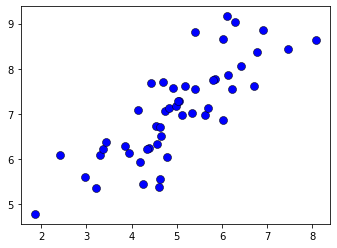

In [ ]:
rng = np.random.RandomState(seed=0)
a = 2*np.pi*(40/360)
X = [5,7] + rng.randn(50,2) @ np.diag([1.5,0.5]) @ [[np.cos(a), np.sin(a)], [-np.sin(a), np.cos(a)]]
plot_data(X)
print(X.shape)

1. Rode o algoritmo PCA (`sklearn.decomposition.PCA`) com $K=n=2$ e obtenha o vetor de média $\bmu$, os autovetores $\bg_1,\ldots,\bg_n$ e seus respectivos autovalores $\lambda_1,\ldots,\lambda_n$. Em seguida, trace setas partindo do ponto de média e indo na direção/sentido dos autovetores, com comprimento igual à raiz quadrada dos respectivos autovalores.

#### Dicas
- Leia a [documentação do PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) e da função `plt.arrow`.
- Na álgebra linear, a convenção mais comum é tratar vetores como vetores-coluna. No entanto, para fins de programação, e em particular nas bibliotecas NumPy e sklearn, é mais conveniente trabalhar com vetores-linha. (Por exemplo, a $i$-ésima linha de uma matriz `X` pode ser obtida simplesmente como `X[i]`.) Em particular, a representação da matriz de autovetores no sklearn é a **transposta** da utilizada nos slides da aula. Assim, fique à vontade para trabalhar diretamente com a matriz $\bG^T$ (que pode ser atribuída, por exemplo, a uma variável `Gt`), a qual fornece os autovetores em suas linhas.

# ~~ Resposta - 10.1.1

Mean:
[4.98626895 7.05558265] 

Eigenvectors:
[[-0.77347907 -0.63382184]
 [-0.63382184  0.77347907]] 

Eigenvalues:
[2.43449395 0.24657229] 



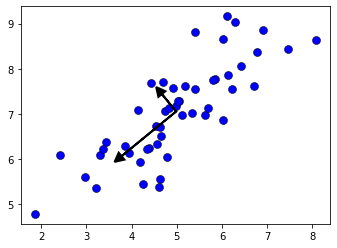

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

mean = pca.mean_

mean = pca.mean_
Eigenvectors = pca.components_
Eigenvalues = pca.explained_variance_

print('Mean:\n{}'.format(mean),'\n')
print('Eigenvectors:\n{}'.format(Eigenvectors),'\n')
print('Eigenvalues:\n{}'.format(Eigenvalues),'\n')

plot_data(X)
for i in range(2):
    plt.arrow(mean[0], mean[1], Eigenvectors[i,0]*np.sqrt(Eigenvalues[i]),Eigenvectors[i,1]*np.sqrt(Eigenvalues[i]), 
              head_width=0.2, head_length=0.2, fc='k', lw=2, zorder=1000)

2. Projete os dados em $K=1$ dimensão, obtendo as coordenadas $\bz$ neste novo espaço (é mais fácil rodar o PCA novamente), e reconstrua os dados no espaço original ($n=2$) a partir destas coordenadas, i.e., aproxime os dados usando apenas a primeira componente principal. Em seguida, trace um gráfico ligando cada ponto original $\bx$ à sua projeção $\hat{\bx}$. Para isso, use a função `plot_data(X, X_rec)`.

# ~~ Resposta - 10.1.2

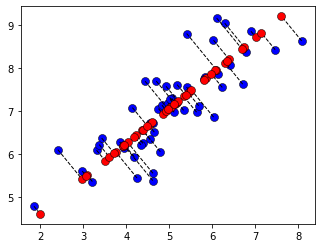

In [ ]:
pca = PCA(n_components = 1)

z = pca.fit_transform(X)

X_rec = pca.inverse_transform(z)
plot_data(X,X_rec)

3. (OPCIONAL) Treine uma rede neural autoencoder de 1 camada oculta com ativação linear e mostre que esse modelo é equivalente a um modelo PCA, no sentido de encontrar o mesmo subespaço gerado pelos componentes principais. Para isso, utilize uma única unidade na camada oculta e extraia os pesos do codificador através de `model.coefs_[0]`. Trace o gráfico desse vetor sobreposto ao conjunto de dados, assim como feito no item 1, e confirme que possui a mesma direção do primeiro componente principal. Lembre-se de centralizar (subtrair a média) do conjunto de dados antes de treinar a rede neural.

# ~~ ---------------------------- - 10.1.3

In [ ]:
from sklearn.neural_network import MLPRegressor
mean = X.mean(axis = 0)
Xc = X - mean
model = MLPRegressor(hidden_layer_sizes = [1], activation = 'identity', solver = 'lbfgs')
model.fit(Xc,X)


MLPRegressor(activation='identity', hidden_layer_sizes=[1], solver='lbfgs')

In [ ]:
'''
print("model coefs_ = ",model.coefs_[0])

print("\n\nmodel intercepts_ = ",model.intercepts_[0])
print("\n\nmodel coefs_[0].T[0] = ",model.coefs_[0].T[0])

print("model.intercepts_[0]*model.coefs_[1] = ",mu)

plot_data(X)
plt.arrow(,*model.coefs_[0].T[0],head_width = 0.2, head_length = 0.2,fc = 'k',lw = 2, zorder = 1000)

'''

'\nprint("model coefs_ = ",model.coefs_[0])\n\nprint("\n\nmodel intercepts_ = ",model.intercepts_[0])\nprint("\n\nmodel coefs_[0].T[0] = ",model.coefs_[0].T[0])\n\nprint("model.intercepts_[0]*model.coefs_[1] = ",mu)\n\nplot_data(X)\nplt.arrow(,*model.coefs_[0].T[0],head_width = 0.2, head_length = 0.2,fc = \'k\',lw = 2, zorder = 1000)\n\n'

# ~~ ------------------------------------------

## 2. Conjunto de dados #2

O próximo conjunto de dados é uma versão redimensionada do conjunto [LFWcrop](https://conradsanderson.id.au/lfwcrop/) e consiste de imagens de faces com dimensões 32 x 32 em escala de cinza. O conjunto já está "achatado" em vetores de comprimento $n=1024$. 

In [ ]:
#!pip install wget

import os
import wget
import h5py
filename = 'faces.h5'
if not os.path.exists(filename):
    wget.download('https://github.com/danilo-silva-ufsc/ml/raw/master/data/' + filename)
with h5py.File(filename, 'r') as file:
    X = file['X'][:]
print(X.shape, X.dtype)

(5000, 1024) int8


Um exemplo das primeiras 50 imagens é mostrado a seguir.

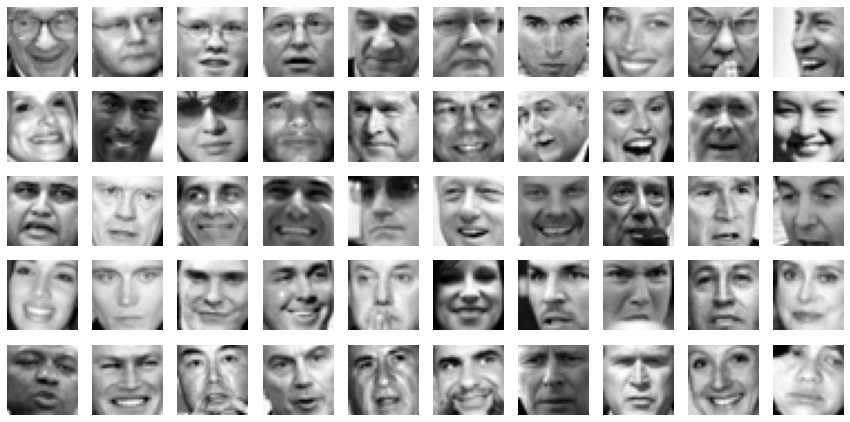

In [ ]:
display_data(X[:50])

1. Rode o algoritmo PCA com K = 100 componentes. Visualize como uma imagem a média e os 39 primeiros componentes principais (em uma grade 4x10). Para isso, utilize a função `display_data`, que já efetua automaticamente a conversão para imagens e organiza em uma grade.

# ~~ Resposta - 10.2.1

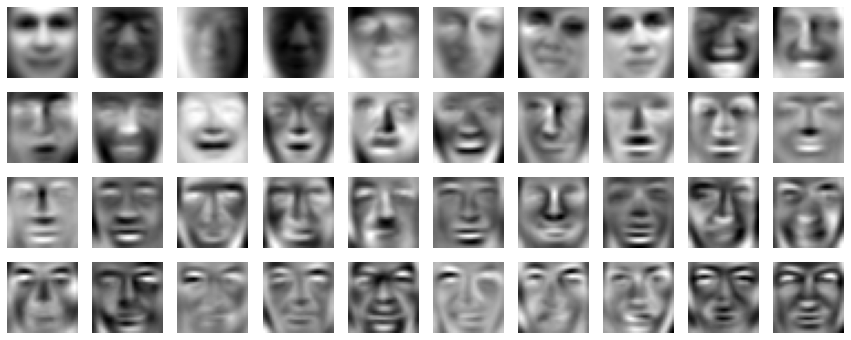

In [ ]:
pca = PCA(n_components = 100)
pca.fit(X)

ima = np.zeros((40,1024))
ima[0,:] = pca.mean_
ima[1:,:] = pca.components_[:39,:]

display_data(ima)

2. Ainda com K=100, transforme as imagens para o espaço de autovetores K-dimensional e em seguida as reconstrua no espaço original. Mostre a versão original e reconstruída das 10 primeiras imagens.

# ~~ Resposta - 10.2.2

In [ ]:
z = pca.transform(X)
X_rec = pca.inverse_transform(z)

from ipywidgets import interact
@interact(i=(0,9))
def _(i=0):
    display_data(X[10*i:10*i+10])
    display_data(X_rec[10*i:10*i+10])

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

3. Determine o número de componentes principais necessários para reter 99% da variância. Em seguida, trace um gráfico com a proporção de variância retida acumulada em função do número de componentes principais. (Obs: será um gráfico crescente.)

# ~~ Resposta - 10.2.3

In [ ]:
#@interact(n_components_=(0,700,1))
#def _(ncomponents_)

pca = PCA(n_components = 0.99)
pca.fit(X)

#print('Number of components:= {:.3f}'.format(n_components_))
print("Number of Components: ",pca.n_components_)
print('Cumulative explained variance:= {:.3f}'.format(np.sum(pca.explained_variance_ratio_)),"%")

Number of Components:  332
Cumulative explained variance:= 0.990 %


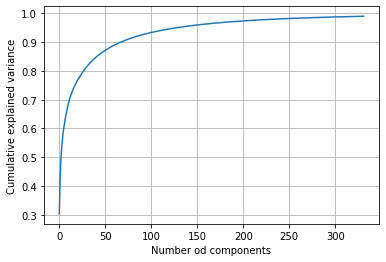

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number od components")
plt.ylabel("Cumulative explained variance")
plt.grid()

4. (OPCIONAL) Encontre e mostre as 20 imagens mais próximas (em distância euclidiana) da imagem `X[25]` (obs: há outras 28 imagens dessa mesma pessoa nesse conjunto.) Para isso, use a função `kneighbors` da classe `sklearn.neighbors.NearestNeighbors`. 

5. Você acha que a extração de atributos via PCA pode fornecer uma representação melhor do que a original, no sentido de que a distância euclidiana no espaço transformado seja mais significativa (mais preditiva para tarefas de aprendizado) do que no espaço original? No caso específico de imagens, você consegue pensar em um modelo de extração de atributos melhor do que PCA?

## 3. Conjunto de dados #3

1. Refaça o item 3.1 do Exercício 9 tendo antes pré-processado as imagens com PCA para reduzir sua dimensionalidade. O objetivo é acelerar o K-Means sem prejudicar significativamente os resultados. Meça a acurácia e o tempo decorrido na clusterização.
2. Trace um gráfico da acurácia e outro do tempo decorrido, ambos em função do número de componentes principais. Em torno de qual valor parece ser o número mais adequado de componentes para esta aplicação?

# - not 10.3.1

In [ ]:
from sklearn.datasets import fetch_openml
X_full, y_full = fetch_openml('mnist_784', return_X_y = True)
y_full = y_full.astype('int8')
print(X_full.shape, y_full.shape)


(70000, 784) (70000,)


In [ ]:
from numpy.random import RandomState
m = 3000
subset = RandomState(seed = 0)
subset.permutation(X_full.shape[0])[:m]
#subset.shape
X = X_full[subset]
y = y_full[subset]
print(X.shape,y.shape)
#subset.shape

IndexError: ignored

In [ ]:
X_full.shape


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from time import time
print("------------------------------------------------------\nWithout PCA")

start = time()
kmeans = KMeans(n_clusters = 10).fit(X)
labels = kmeans.predict(X)

#matriz de contingencia
contingency_matrix = metrics.cluster.contingency_matrix(y, labels)

#melhor mapeamento entre clusters e rotulos
best_map = np.amax(contingency_matrix,axis = 0)

#acuracia
Acc = (np.sum(best_map) / np.sum(contingency_matrix))*100
print('Cluster accuracy', Acc)

print('Tempo total: {:.2f} minutos'.format((time()-start)/60))
print("------------------------------------------------------\nWith PCA")
start = time()

pca = PCA(n_components = 50)
pca.fit(X)
Z = pca.transform(X)

kmeans = KMeans(n_clusters = 10).fit(Z)
labels = kmeans.predict(Z)

contingency_matrix = metrics.cluster.contingency_matrix(y,labels)
best_map = np.amax(contingency_matrix, axis = 0)

Acc = (np.sum(best_map)/np.sum(contingency_matrix))*100

print('Cluster accuracy',Acc,"% \n")
print('Tempo total: {:.2f} minutos'.format((time()-start)/60))


# ~~ not 10.3.2

In [ ]:


acc_vec = np.zeros(200)
time_value = np.zeros(200)
for aux in range(200):
    start = time()
    pca = PCA(n_components = aux + 1)
    pca.fit(X)
    Z = pca.transform(X)
    
    kmeans = KMeans(n_clusters = 10).fit(Z)
    labels = kmeans.predict(Z)
    contingency_matrix = metrics.cluster.contingency_matrix(y,labels)
    best_map = np.amax(contingency_matrix,axis = 0)
    acc_vec[aux] = (np.sum(best_map) / np.sum(contingency_matrix))
    time_value[aux] = time() - start

NameError: ignored

In [ ]:

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(acc_vec)
#plt.xlim([0, 50])
#plt.ylim([0.5, 0.65])
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(time_value/60)
plt.xlabel('Number of components')
plt.ylabel('Elapsed ime (min)')
plt.grid()
plt.show()

### Resposta: 

-----------------------------------------------------------------------------------
 <font size="3">O valor adequado do número de componentes para esta aplicação ficaria em torno de 15 componentes, já que para valores maiores a acurácia se mantém oscilando em torno do mesmo valor e para valores menores a acurácia ainda é muito baixa. Para esta faixa de valores a acurácia obtida ficou em torno de 0,58 , um valor muito próximo daquela obtida para o modelo sem o PCA. 

 Para tais números de componentes o valor de tempo de execução é inferior a 0,0075 minutos, valor bem abaixo do obtido pelo modelo sem PCA. 
 
-----------------------------------------------------------------------------------
</font> 




## 4. Conjunto de dados #4

O próximo conjunto consiste de dados de transações de cartão de crédito, disponível em:

https://www.kaggle.com/mlg-ulb/creditcardfraud

O objetivo é identificar transações fradulentas. Os atributos consistem do rótulo da transação ($y=1$ corresponde a uma transação fradulenta) e 30 atributos de entrada, sendo que destes 28 correspondem às componentes principais dos atributos originais, os quais não são fornecidos por uma questão de confidencialidade. (Incidentalmente, este conjunto ilustra mais uma aplicação de PCA: anonimização.)

O conjunto é formado por 284807 amostras, sendo destas 492 fradulentas (anômalas). Separe 2/3 das amostras normais como conjunto de treinamento, e como conjunto de validação utilize todas as amostras anômalas e as restantes 1/3 de amostras normais, conforme proposto em:

https://www.dataversity.net/fraud-detection-using-a-neural-autoencoder/

O treinamento deve ser feito usando exclusivamente o conjunto de treinamento, enquanto o conjunto de validação deve ser usado para selecionar o limiar de classificação que maximiza o score F1.

1. Primeiramente, treine um modelo gaussiano, que servirá como baseline de comparação.

2. Em seguida, desenvolva um modelo usando uma rede autoencoder (utilizando Keras), com desempenho superior ao modelo gaussiano. Fique à vontade para utilizar múltiplas camadas e funções de ativação.

Para desenvolver e testar a rede autoencoder, separe como conjunto de teste (ou, mais precisamente, validação dessa etapa) uma fração de 10% do conjunto de treinamento, conforme proposto no link acima.

3. Reporte os resultados obtidos. Comente.

### Dicas
- Pode ser útil normalizar os dados.
- Experimente também excluir atributos.

# ~~ Resposta - 10.4.1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scipy.stats import multivariate_normal
import numpy as np


data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
X = data.to_numpy()[:,:-1]
y = data.to_numpy()[:,-1]

#excluindo atributos:
#X = X[:,10:20]

print(X.shape, y.shape)
#---------------------

(284807, 30) (284807,)


In [3]:
frauds = data[data.Class == 1 ]
normal = data[data.Class == 0 ]

X = normal.to_numpy()[:,:-1]
y = normal.to_numpy()[:,-1]

print(X.shape, y.shape)

#separando amostras
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size = 1/3, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_val.shape,y_val.shape)

X_val = np.concatenate((X_val,frauds.to_numpy()[:,:-1]))
y_val = np.concatenate((y_val,frauds.to_numpy()[:,-1]))
print(X_val.shape,y_val.shape)

#normalização
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_val_new = scaler.transform(X_val)

(284315, 30) (284315,)
(189543, 30) (189543,)
(94772, 30) (94772,)
(95264, 30) (95264,)


In [4]:
from sklearn.metrics import f1_score
def select_threshold(p,y):
    step_value = (max(p) - min(p)) / 1000;  #usar logspace pra melhorar o f1 0.019
    epsilon = np.arange(min(p),max(p),step_value)
    F1_value = np.zeros(len(epsilon))
    
    for  aux in range(len(epsilon)):
        y_pred = np.zeros(y.shape)
        y_pred[np.where(p < epsilon[aux])] = 1
        F1_value[aux] = f1_score(y, y_pred)
    idx = np.argmax(F1_value)
    return epsilon[idx], F1_value[idx]

### Baseline : gaussiano

In [5]:
# baseline: gaussiano
model_baseline = multivariate_normal(mean = np.mean(X_train_new,axis = 0), 
                                     cov = np.cov(X_train_new.T))    
epsilon, F1 = select_threshold(model_baseline.pdf(X_val_new),y_val)
y_val_pred = np.zeros(y_val.shape)
y_val_pred[np.where(model_baseline.pdf(X_val_new) < epsilon)] = 1

print('Epsilon: {}'.format(epsilon))
print('F1: {}'.format(F1))
print('Anomaly number : {}'.format(np.sum(y_val_pred)))

Epsilon: 9.012590834262743e-16
F1: 0.019418663946965835
Anomaly number : 48533.0


In [6]:
# separação do conjunto de teste com 10% do conjunto de treinamento
X_train_new_2, X_test, y_train_new_2,y_test = train_test_split(X_train,y_train,test_size = 0.1, random_state = 0)
print(X_train_new_2.shape, y_train_new_2.shape)
print(X_val_new.shape,y_val.shape)
print(X_test.shape,y_test.shape)

#normalização
scaler = StandardScaler()
X_train_new_3 = scaler.fit_transform(X_train_new_2)
X_val_new_3 = scaler.transform(X_val_new)
X_test_new_3 = scaler.transform(X_test)

(170588, 30) (170588,)
(95264, 30) (95264,)
(18955, 30) (18955,)


### Modelo com rede autoencoder

In [7]:
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

#modelo com rede autoencoder

autoencoder_model = Sequential()

autoencoder_model.add(Dense(units=30,input_dim = X_train_new_3.shape[1], activation = 'tanh',activity_regularizer=regularizers.l1(1e-7)))
autoencoder_model.add(Dense(units=7, activation = 'relu',activity_regularizer=regularizers.l1(1e-7)))
autoencoder_model.add(Dense(units=7, activation = 'tanh',activity_regularizer=regularizers.l1(1e-7)))
autoencoder_model.add(Dense(units=30, activation = 'relu',activity_regularizer=regularizers.l1(1e-7)))


autoencoder_model.compile(optimizer = Adam(),
                          loss = 'mean_squared_error',
                         metrics = ['accuracy'])
'''
es = EarlyStopping(monitor = 'val_loss',
                  mode = 'min',
                  verbose = 1,
                  patience = 10)

mc = ModelCheckpoint('model_credit.h5',
                    monitor = 'val_loss',
                    mode= 'min',
                    save_best_only = True)
'''

history = autoencoder_model.fit(X_train_new_3,y_train_new_2,
                                epochs = 10,
                                batch_size = 50,
                                validation_data = (X_val_new_3,y_val),
                               # callbacks = [es,mc],
                                validation_split=0.1,
                                verbose=1)



Epoch 1/10
3071/3071 [==============================] - 15s 4ms/step - loss: 0.0012 - accuracy: 0.7358 - val_loss: 1.8406e-06 - val_accuracy: 0.9953
Epoch 2/10
3071/3071 [==============================] - 13s 4ms/step - loss: 1.8105e-06 - accuracy: 0.9972 - val_loss: 1.7029e-06 - val_accuracy: 0.9989
Epoch 3/10
3071/3071 [==============================] - 14s 4ms/step - loss: 1.6797e-06 - accuracy: 0.9994 - val_loss: 1.5782e-06 - val_accuracy: 0.9999
Epoch 4/10
3071/3071 [==============================] - 13s 4ms/step - loss: 1.5128e-06 - accuracy: 0.9998 - val_loss: 1.2020e-06 - val_accuracy: 0.9998
Epoch 5/10
3071/3071 [==============================] - 12s 4ms/step - loss: 1.0264e-06 - accuracy: 0.9999 - val_loss: 3.5943e-07 - val_accuracy: 0.9999
Epoch 6/10
3071/3071 [==============================] - 12s 4ms/step - loss: 2.5788e-07 - accuracy: 1.0000 - val_loss: 9.1982e-08 - val_accuracy: 1.0000
Epoch 7/10
3071/3071 [==============================] - 12s 4ms/step - loss: 7.1054e-0

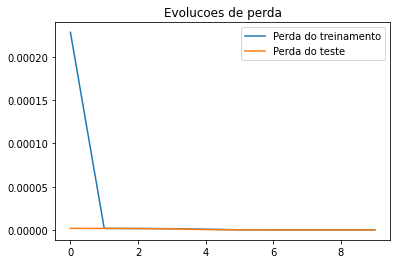

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Evolucoes de perda')
plt.legend(['Perda do treinamento','Perda do teste']);


In [9]:
X_pred = autoencoder_model.predict(X_val_new_3)
print("X_pred.shape: ",X_pred.shape)

X_pred.shape:  (95264, 30)


In [ ]:
X_pred = autoencoder_model.predict(X_val_new_3 )

erro = np.zeros(len(X_val_new_3 ))

for i in range(len(X_val_new_3) ):
  erro[i] =1/len(X_val_new_3 )*np.linalg.norm((X_pred[i]-X_val_new_3[i]))**2

  eps_auto,f1_auto = select_threshold(erro,y_val) #,type='autoencoder')
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
print("X_val_new_3.shape: ",X_val_new_3.shape)
print("X_pred.shape: ",X_pred.shape)

In [ ]:
'''
import matplotlib.pyplot as plt

#Data plot
_, acc_train = autoencoder_model.evaluate(X_train_new_3,X_train_new_3,verbose = False)
_, acc_val = autoencoder_model.evaluate(X_train_new_3,X_train_new_3,verbose = False)
_, acc_test = autoencoder_model.evaluate(X_train_new_3,X_train_new_3,verbose = False)

print('Train accuracy: {:.1%}'.format(acc_train))
print('Val accuracy: {:.1%}'.format(acc_val))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'],label = 'Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'.-')
plt.plot(history.history['val_accuracy'],'.-')
plt.title('Model accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.grid()
plt.legend(['train','val'],loc = 'lower right')
plt.show()
'''

In [ ]:
# Resultados de Validação
X_val_pred =  autoencoder_model.predict(X_val_new_3)
MSE_val = np.mean(np.power(X_val_new_3 - X_val_pred,2),axis = 1)
error_val = pd.DataFrame({'reconstruction_error': MSE_val,'true_class':y_val})
error_val.describe()

Epsilon,F1 = select_threshold(error_val.reconstruction_error.values,y_val)
print('Epsilon',Epsilon)
print('F1',F1)
y_val_pred = np.zeros(y.shape)
y_val_pred[np.where(MSE_val> Epsilon)] = 1
print('Anomaly number: {}'.format(np.sum(y_val_pred)))

In [ ]:
'''
# resultados para X_test
X_test_pred =  autoencoder_model.predict(X_test_new_3)
MSE_test = np.mean(np.power(X_test_new_3 - X_test_pred,2),axis = 1)
error_test = pd.DataFrame({'reconstruction_error': MSE_test,'true_class':y_test})
error_test.describe()

Epsilon,F1 = select_threshold(error_test.reconstruction_error.values,y_test)
print('Epsilon',Epsilon)
print('F1',F1)
y_test_pred = np.zeros(y.shape)
y_test_pred[np.where(MSE_val> Epsilon)] = 1
print('Anomaly number: {}'.format(np.sum(y_test_pred)))
'''

# Sistemas de recomendação

Nesta parte do exercício iremos utilizar o Keras para implementar um sistema de recomendação. Um exemplo é mostrado abaixo (conjunto de dados retirado dos slides).

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Embedding, Flatten, Dot
from tensorflow.keras.optimizers import Adam

n_users = 4
n_items = 5

title = {0: 'Star Wars',
         1: 'Matrix',
         2: 'X-Men',
         3: 'Titanic',
         4: 'Casablanca'}

# [user, item, rating]
data = np.array([[0,0,0],
                 [0,1,0],
                 [0,3,4],
                 [1,0,5],
                 [1,1,5],
                 [1,3,0],
                 [1,4,0],
                 [2,0,5],
                 [2,2,4],
                 [2,3,0],
                 [2,4,0],
                 [3,0,0],
                 [3,2,0],
                 [3,3,5],
                 [3,4,5]])

x = data[:,[0,1]]
y = data[:,2]

n_factors = 2

def get_model():
    x = Input(shape=(2,), dtype='int64')
    z1 = Embedding(n_users, n_factors, name='user_embedding')(x[:,0])
    z1 = Flatten()(z1)
    z2 = Embedding(n_items, n_factors, name='item_embedding')(x[:,1])
    z2 = Flatten()(z2)
    y = Dot(axes=1)([z1, z2])
    model = Model(inputs=x, outputs=y)
    return model

get_model().summary()

In [ ]:
model = get_model()
model.compile(loss='mse', optimizer=Adam(lr=0.1))
history = model.fit(x, y, epochs=80)

In [ ]:
for i in [2, 4]:
    print("Alice's predicted rating for {}:".format(title[i]), model.predict(np.array([[0,i]])).squeeze())

In [ ]:
# Matrix of item embeddings
Q = model.get_layer('item_embedding').weights[0].numpy()

In [ ]:
from sklearn.neighbors import NearestNeighbors

i = 3
K = 2
nbrs = NearestNeighbors(n_neighbors=K).fit(Q)
_, indices = nbrs.kneighbors(Q[[i]])
print('The {} most similar to {} (including itself) are:'.format(K, title[i]))
for j in indices[0]:
    print(title[j])

In [ ]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=2)
cluster.fit(Q)
for k in range(cluster.n_clusters):
    print('Cluster {}:'.format(k))
    for i in np.where(cluster.labels_ == k)[0]:
        print(title[i])
    print()

## 5. Conjunto de dados #5

1. Baseado no exemplo acima, desenvolva um modelo de predição para o conjunto de dados [MovieLens Latest Small](https://grouplens.org/datasets/movielens), o qual consiste de 100836 avaliações de 9742 filmes feitas por 610 usuários entre março de 1996 e setembro de 2018 (leia mais na [documentação](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html)). Certifique-se de separar o conjunto em 90% de treinamento e 10% de validação e meça o MSE de validação.

2. (OPCIONAL) Para melhorar o desempenho do modelo, introduza *biases* de usuários e de filmes, bem como um *bias* geral. Outra técnica que ajuda é restringir os valores da saída através de uma função sigmóide, naturalmente escalonada para a faixa de interesse. Veja se consegue alcançar um MSE de validação de aproximadamente 0.74.

3. (OPCIONAL) Explore o modelo obtido: forneça as 10 melhores recomendações para algum usuário, encontre filmes similares a um dado filme e encontre clusters de filmes semelhantes.

#### Dicas
- Será necessário aplicar um codificador como o `sklearn.preprocessing.OrdinalEncoder(dtype=int)` para converter o conjunto de usuários e o conjunto de itens em inteiros consecutivos a partir de zero, pois isso é assumido pela camada de Embedding do Keras (em particular, os índices dos filmes não são consecutivos).
- As seguintes camadas do Keras podem ser úteis: `Add` e `Lambda`.

In [ ]:
from zipfile import ZipFile
from tensorflow.keras.utils import get_file
filename = 'ml-latest-small.zip'
url = 'http://files.grouplens.org/datasets/movielens/' + filename
with ZipFile(get_file(filename, url)) as z:
    movies = pd.read_csv(z.open('ml-latest-small/movies.csv'), index_col=0)
    data = pd.read_csv(z.open('ml-latest-small/ratings.csv'), usecols=[0,1,2])

In [ ]:
def search(query):
    return movies[movies.title.str.contains(query, case=False)]

In [ ]:
# from title to movieId
search('matrix')

In [ ]:
# from movieId to title
movies.title[2571]

In [ ]:
# ratings
data

In [ ]:
    from sklearn.preprocessing import OrdinalEncoder
    
    X = data.to_numpy()[:,[0,1]]
    y = data.to_numpy()[:,2]
    
    X_int = OrdinalEncoder(dtype = int).fit_transform(X)
    
    X_train, X_val, y_train, y_val = train_test_split(X_int,y,test_size = 0.1, random_state = 0)
    X_train.shape,X_test.shape,y_val.shape,y_val.shape
    
    n_users = 610
    n_items = 9742
    
    model_int = get_model()
    model_int.compile(loss = 'mse', optimizer = Adam(lr=0.001),metrics = ['accuracy'])
    history = model_int.fit(X_train, y_train, epochs = 80, validation_data = (X_val,y_val))